# Submission Kaggle avec des modèles de Régression

### Récupération des output du notebook de préparation de données

(1460, 81)
(1459, 80)


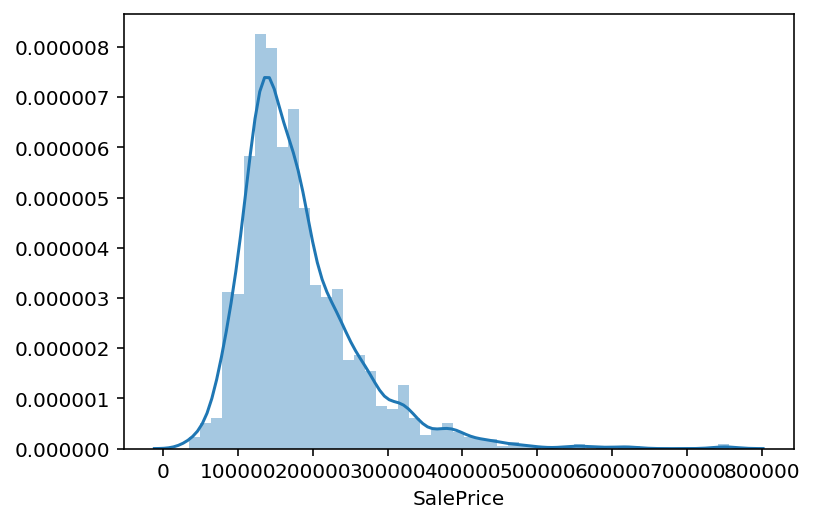

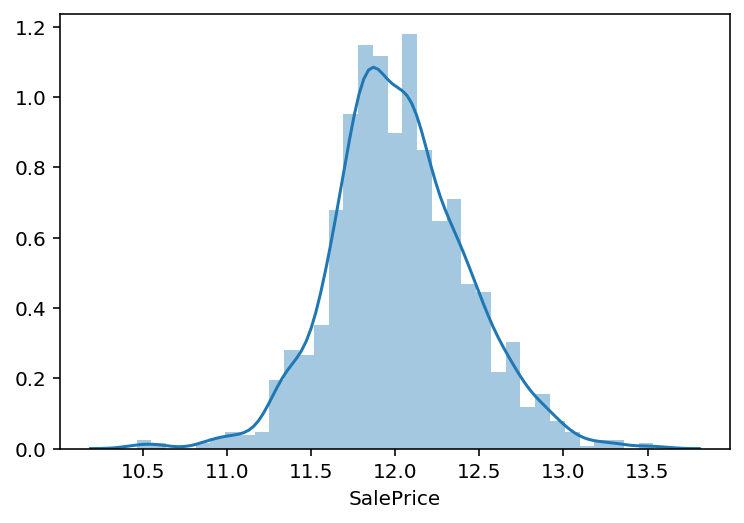

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Kitch

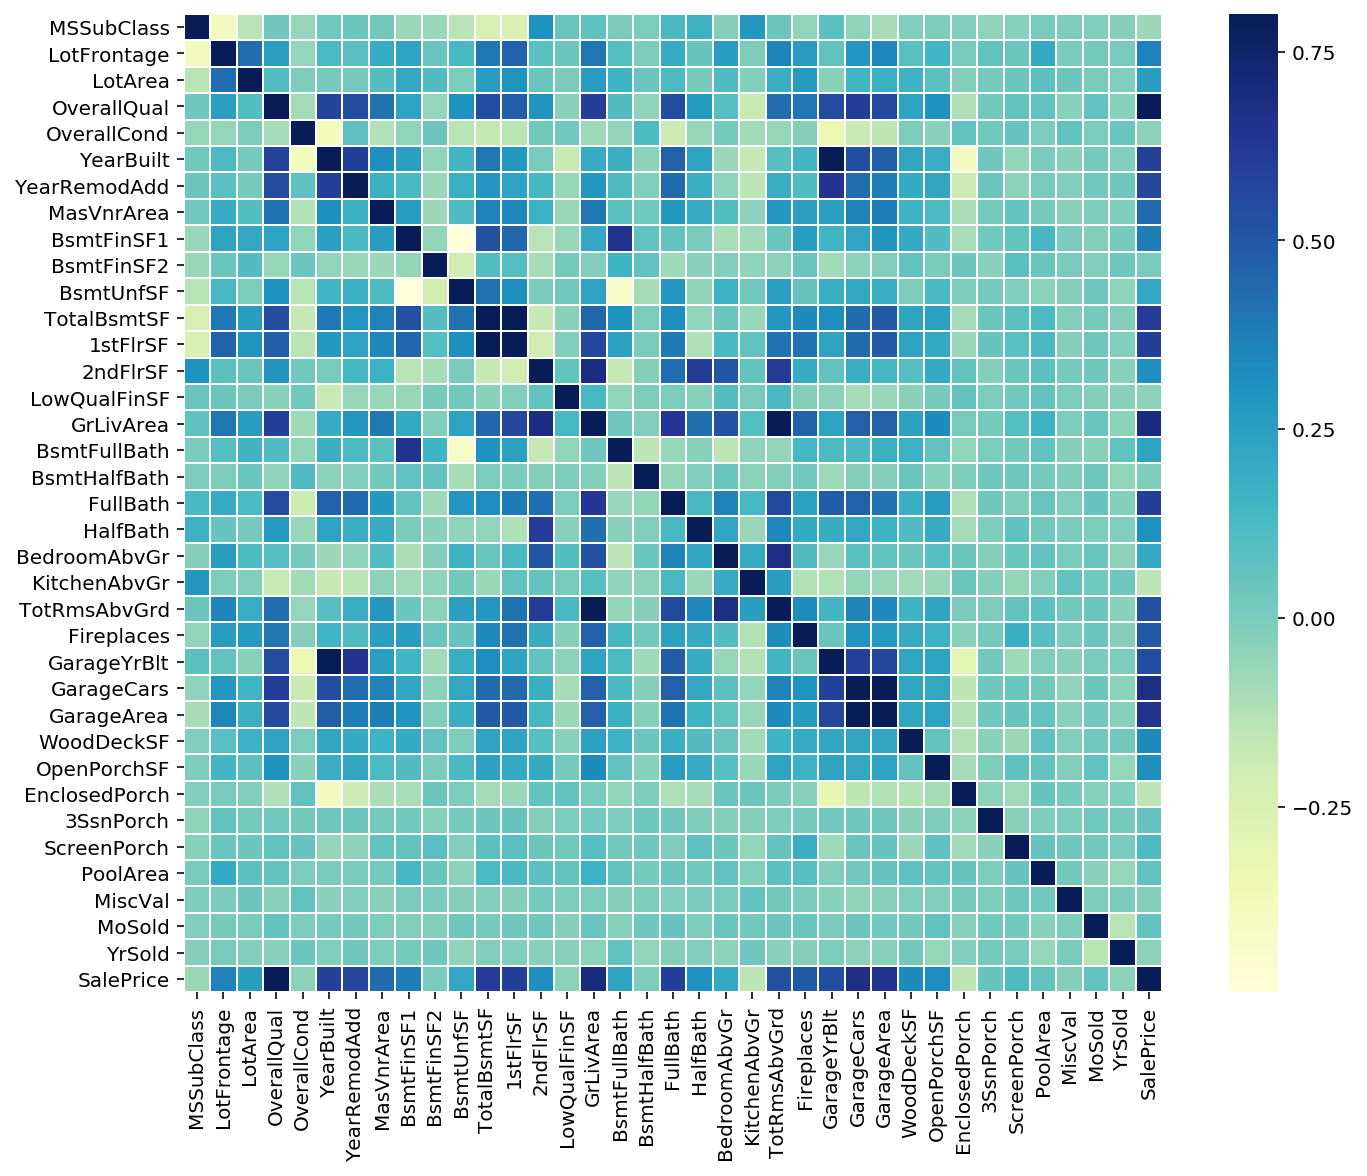

OverallQual 0.82
GrLivArea 0.7
GarageCars 0.68
GarageArea 0.65
TotalBsmtSF 0.61
1stFlrSF 0.6
YearBuilt 0.59
FullBath 0.59
YearRemodAdd 0.57
GarageYrBlt 0.54
TotRmsAbvGrd 0.53


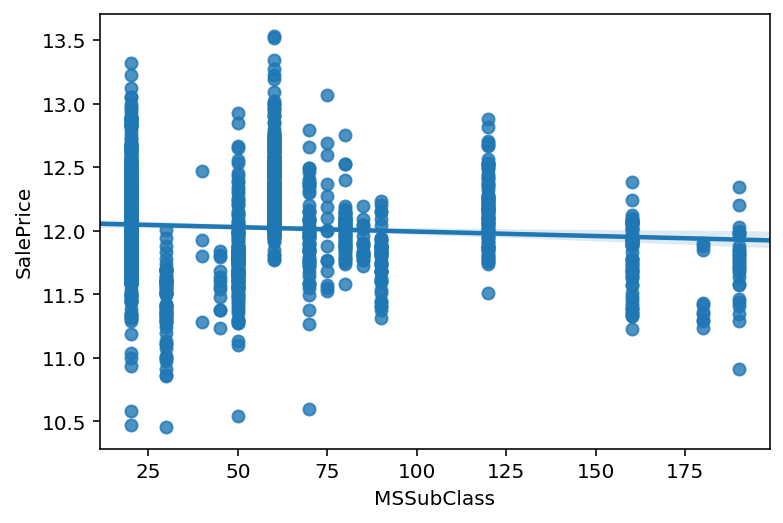

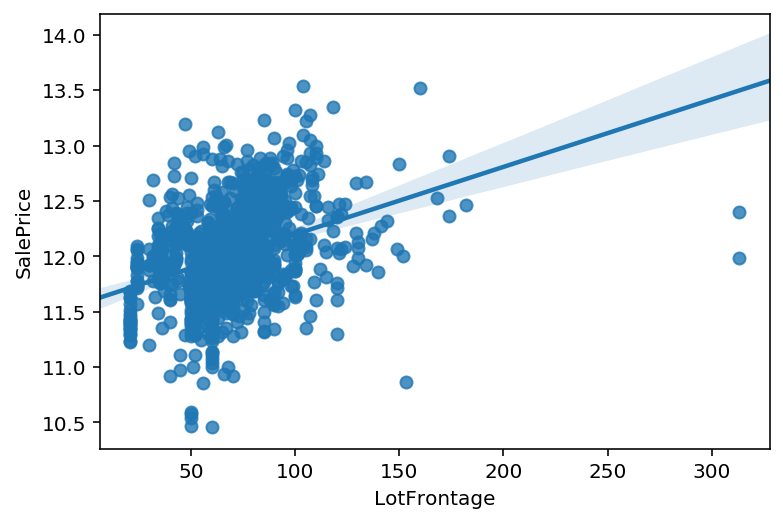

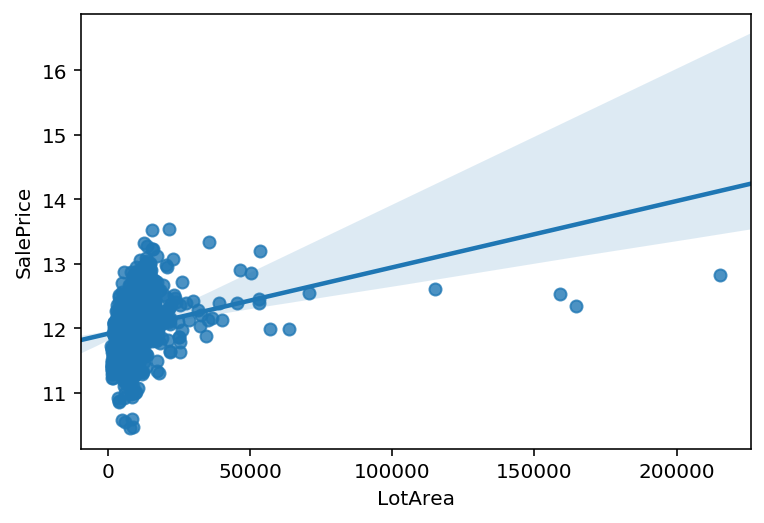

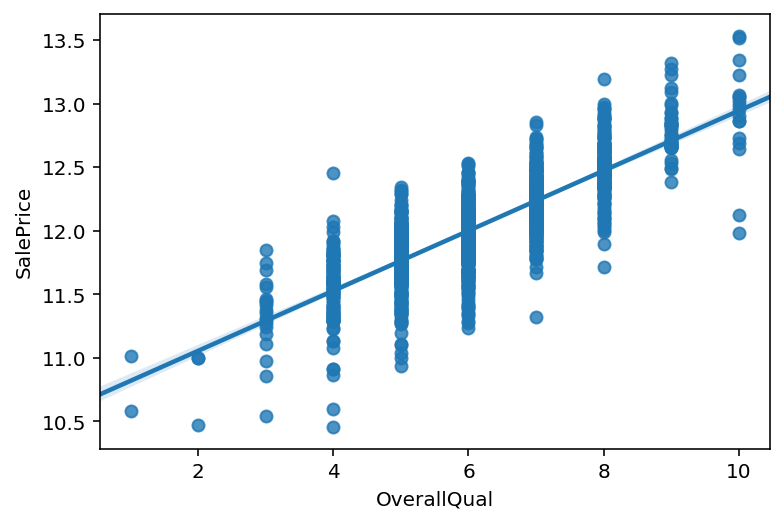

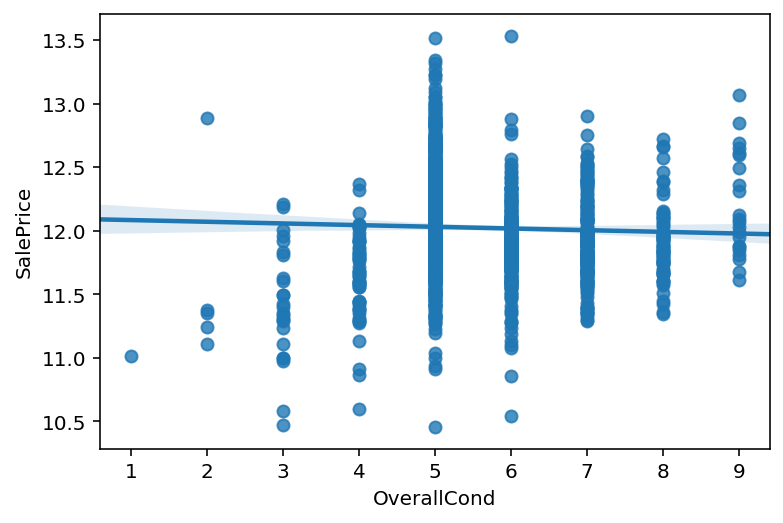

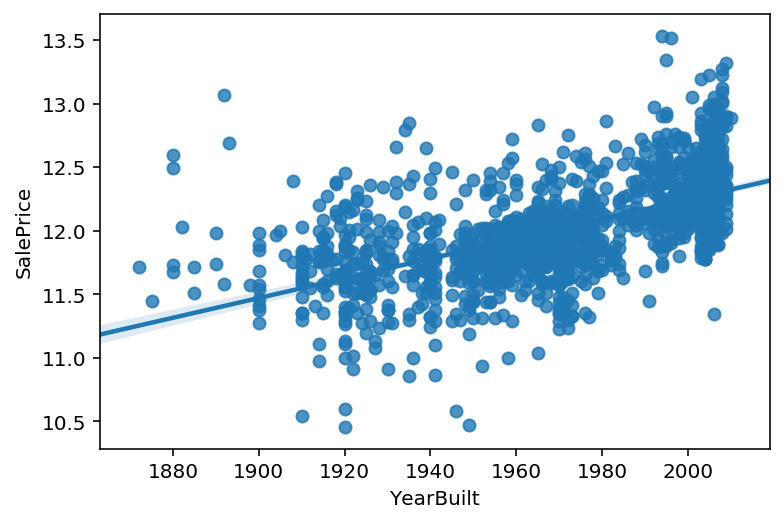

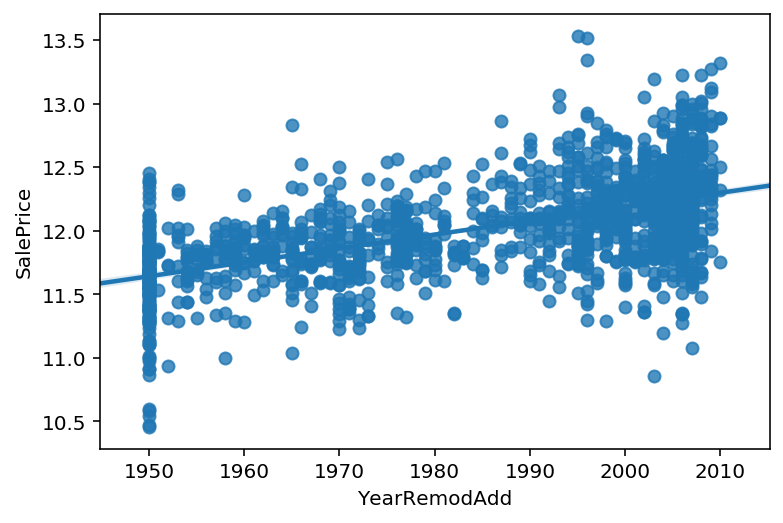

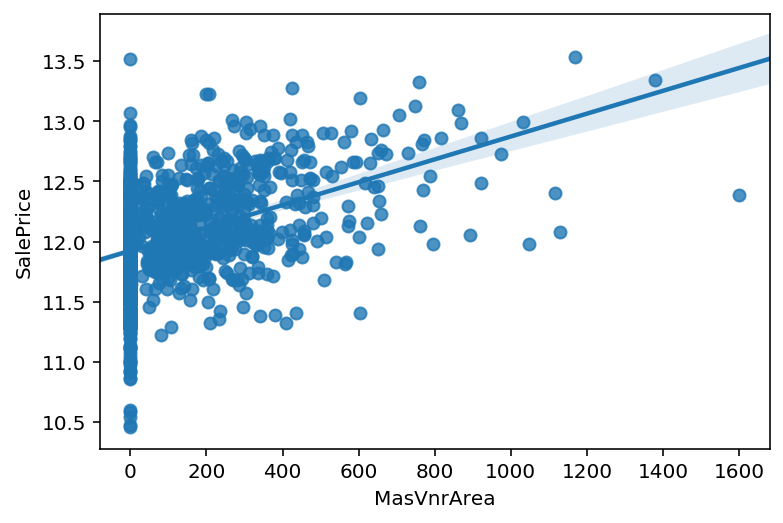

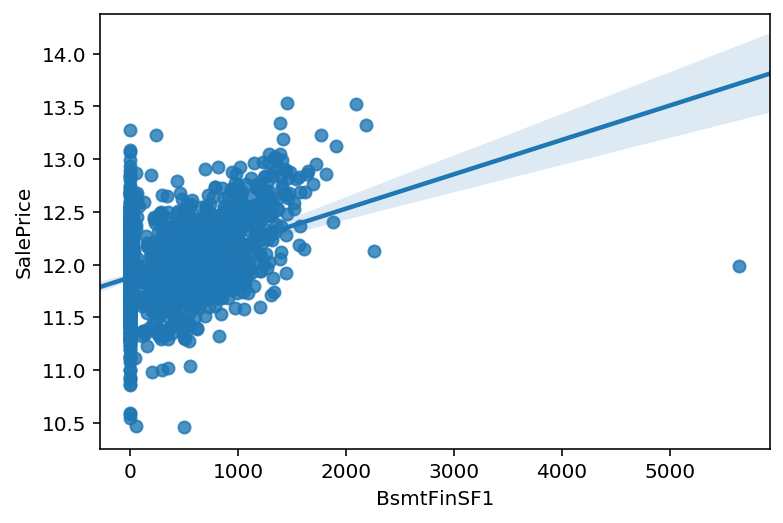

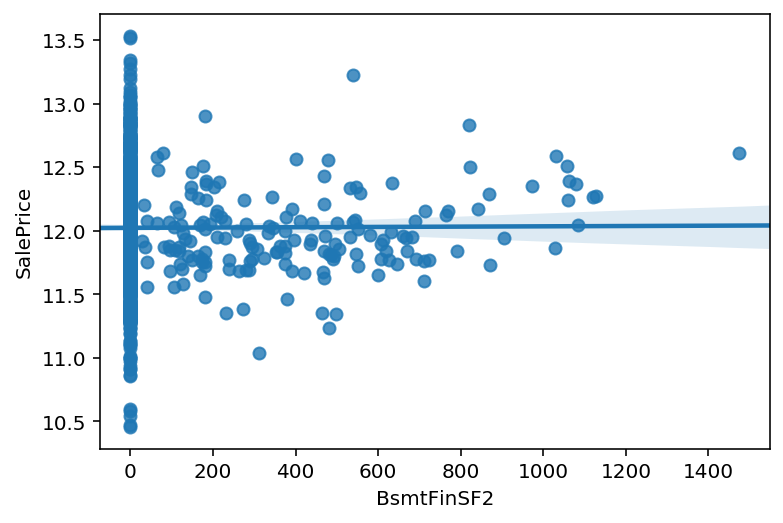

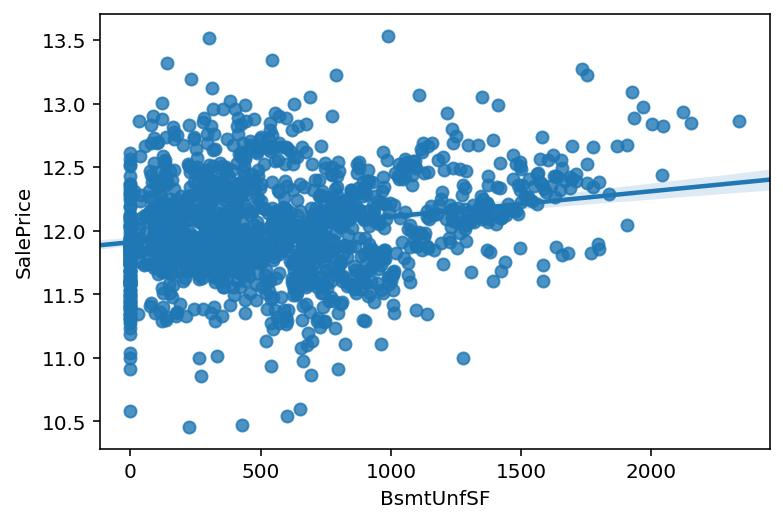

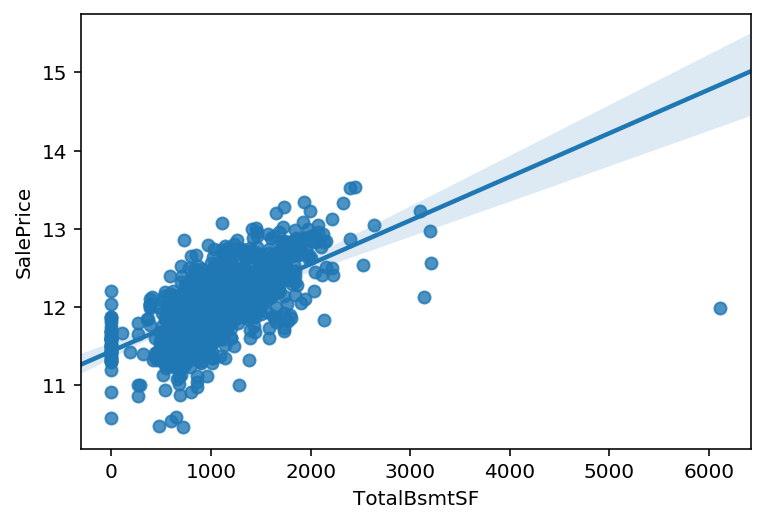

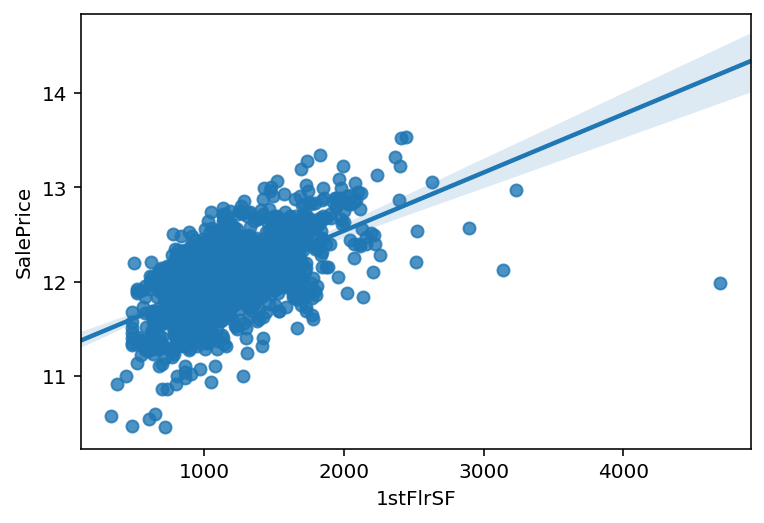

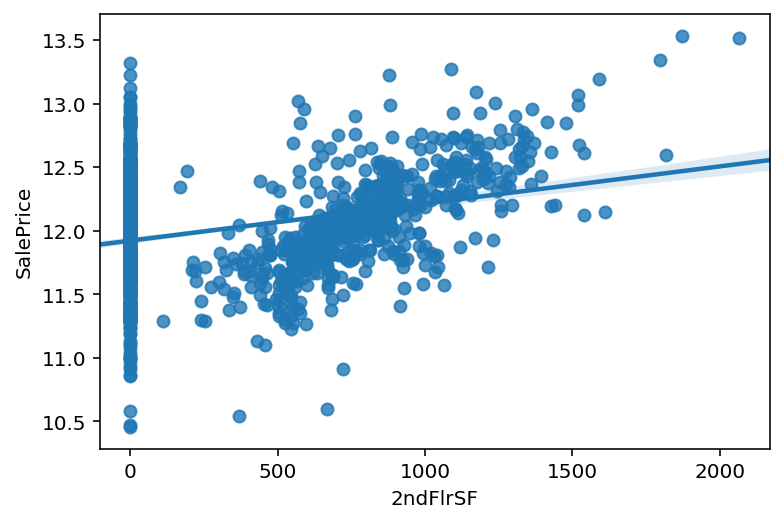

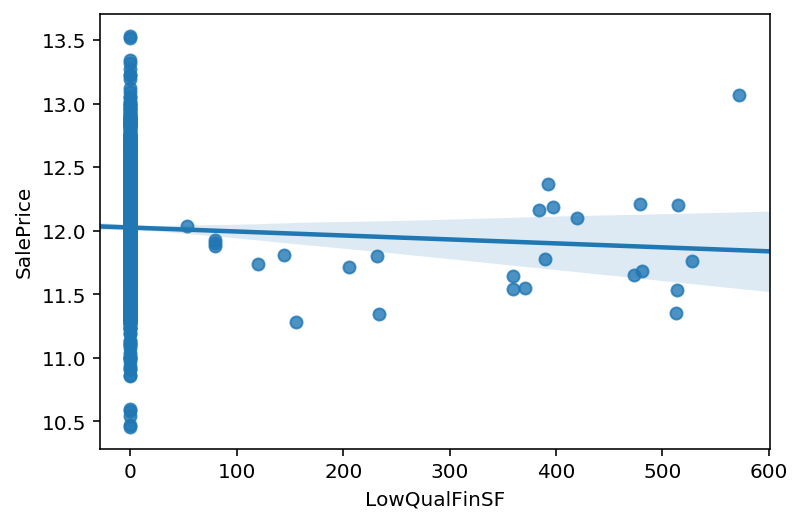

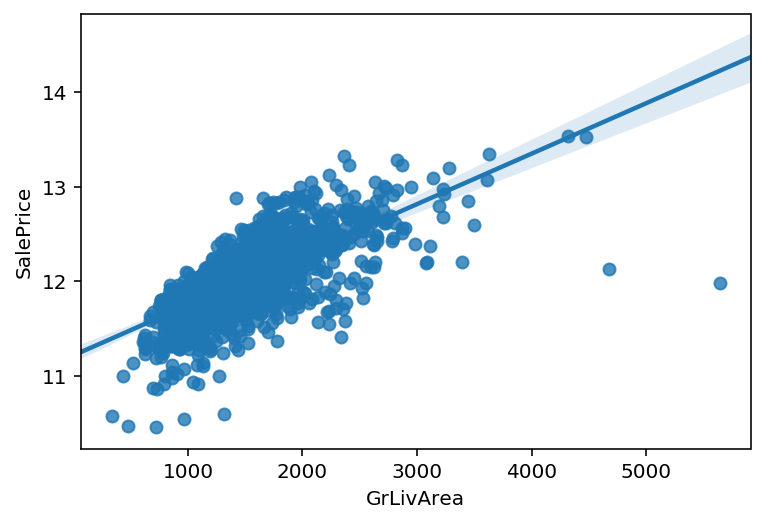

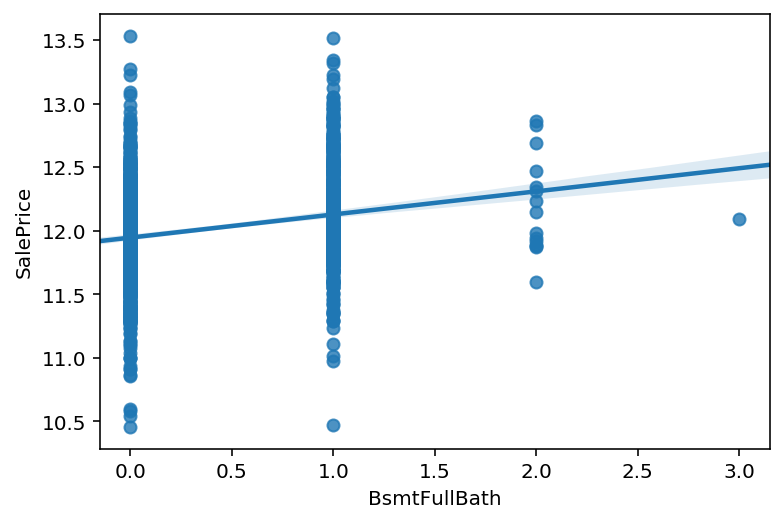

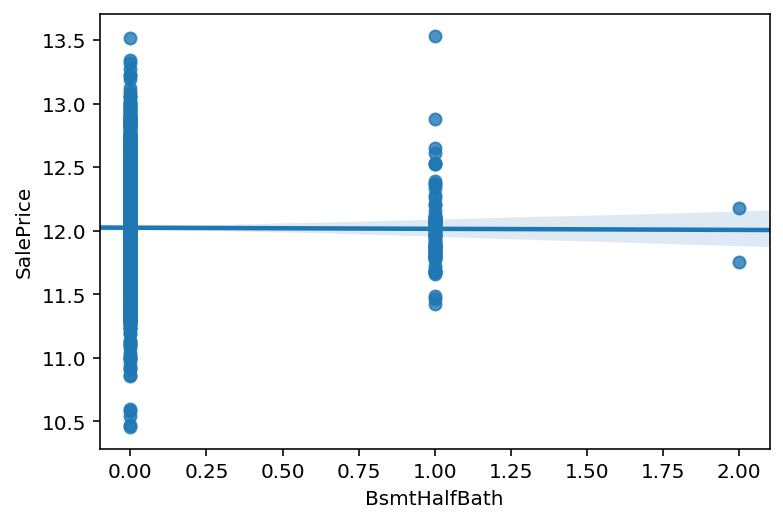

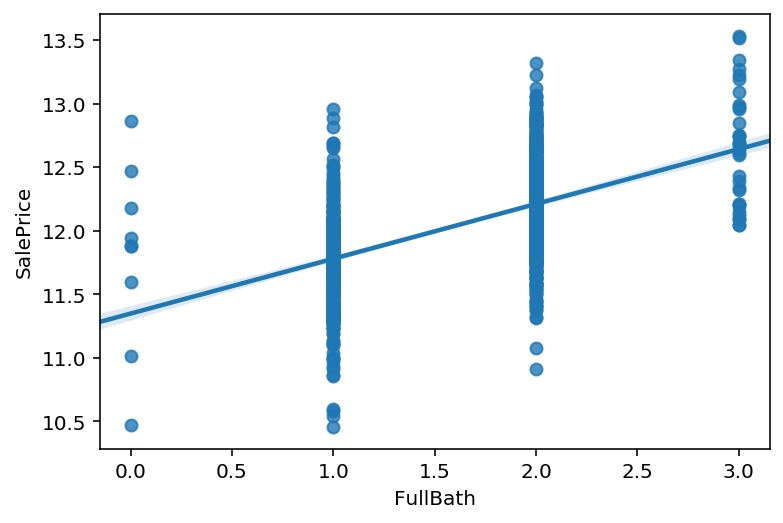

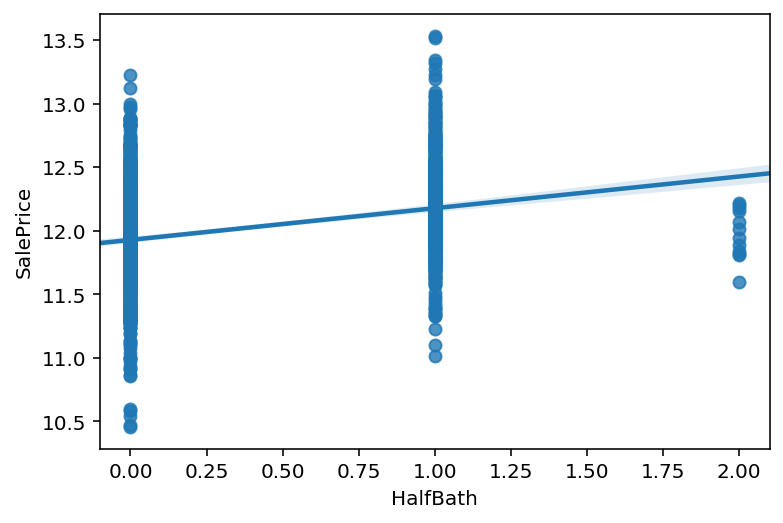

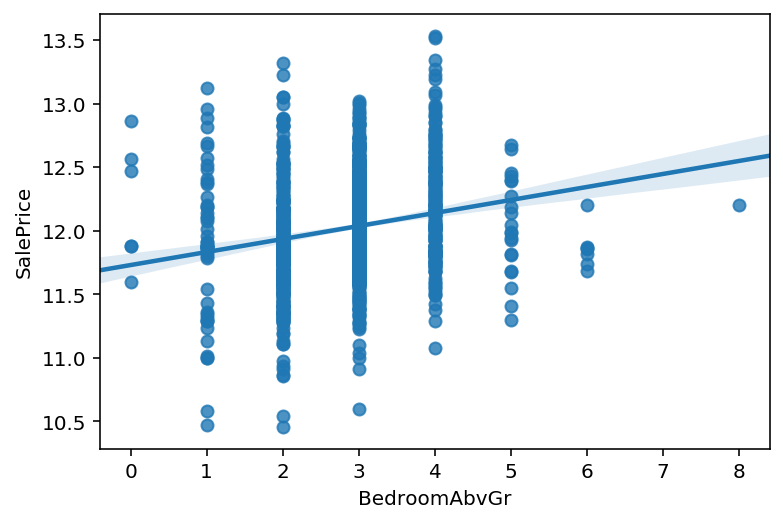

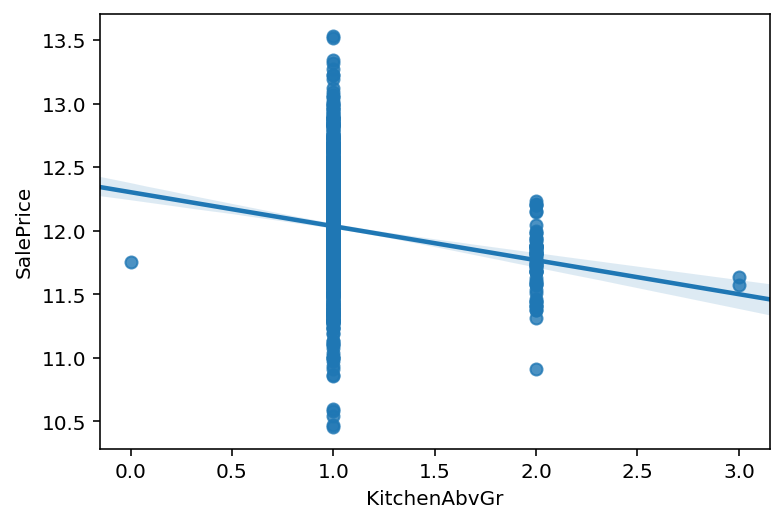

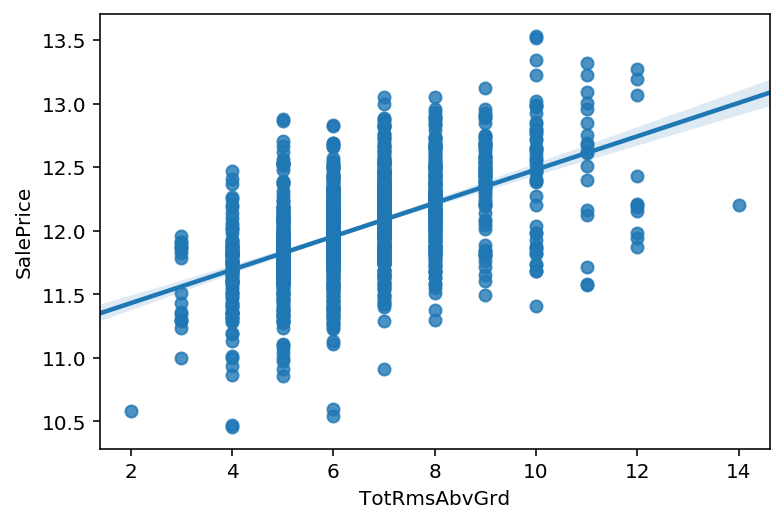

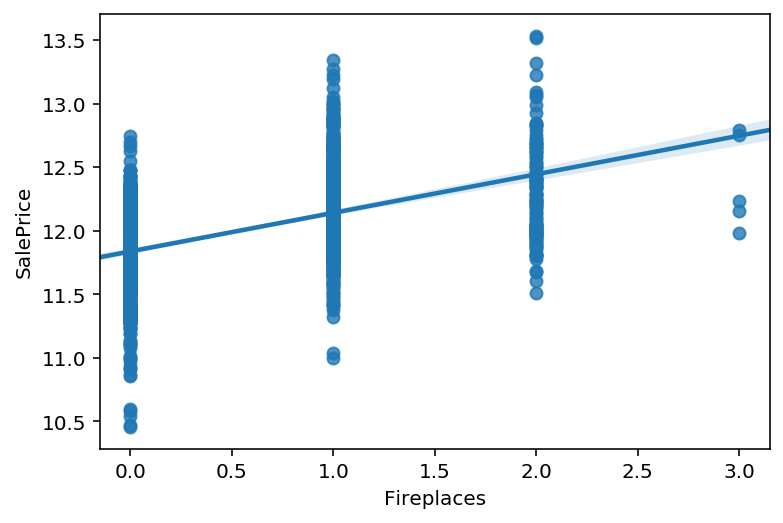

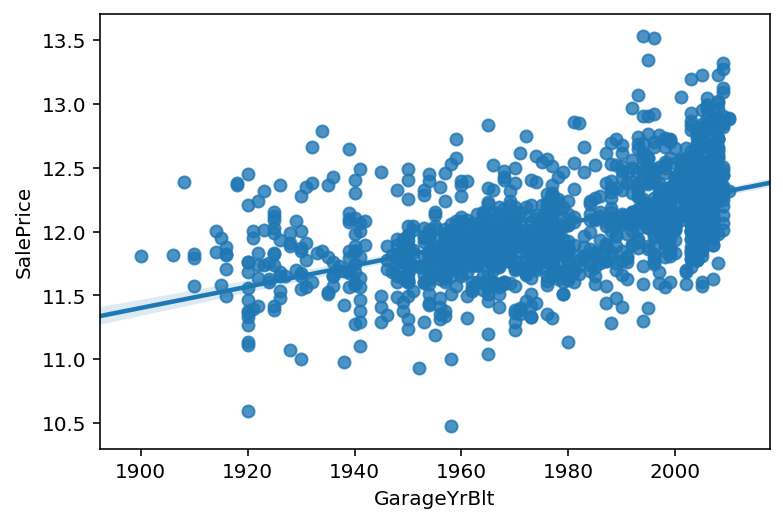

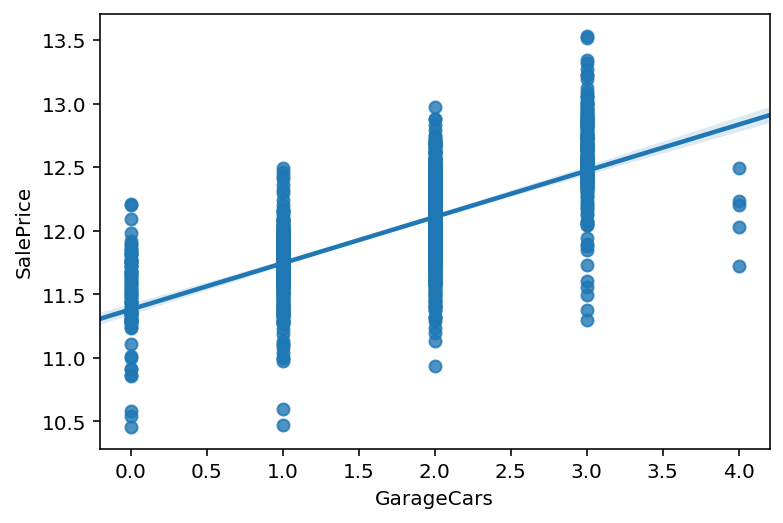

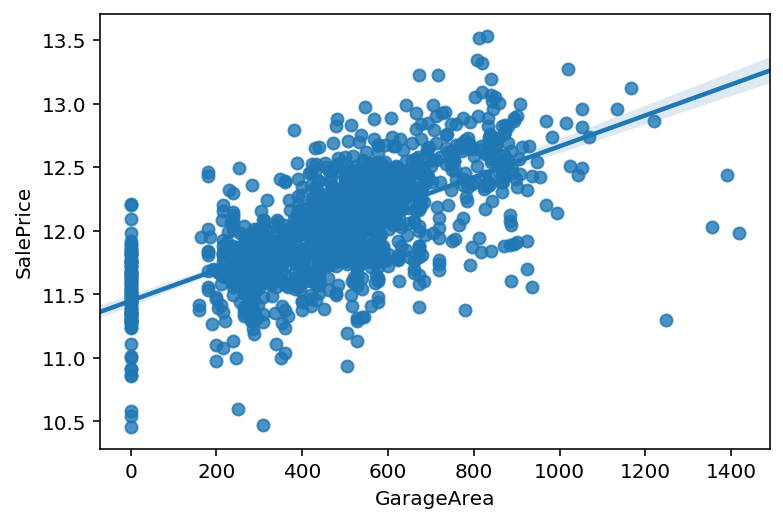

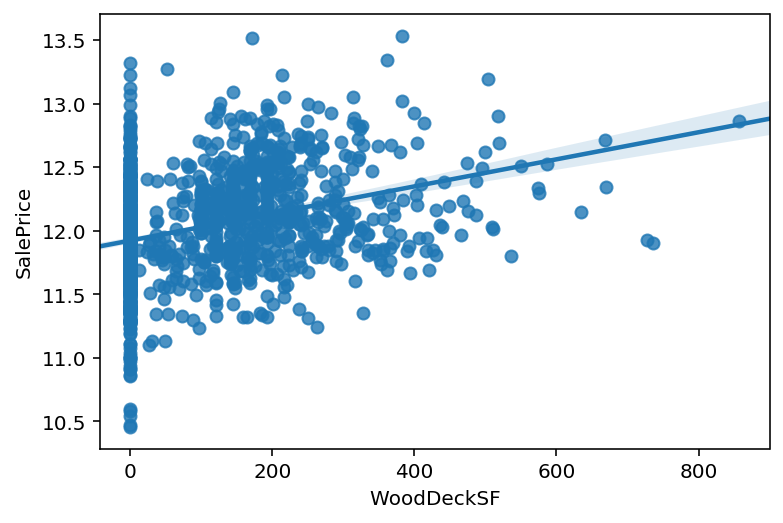

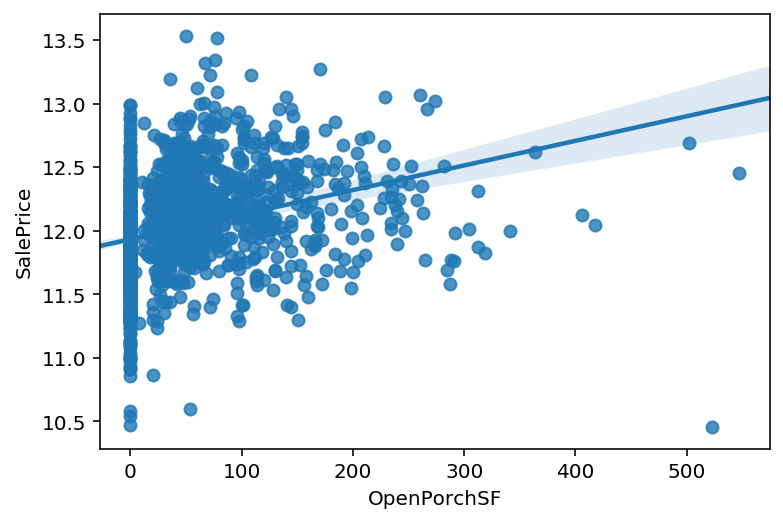

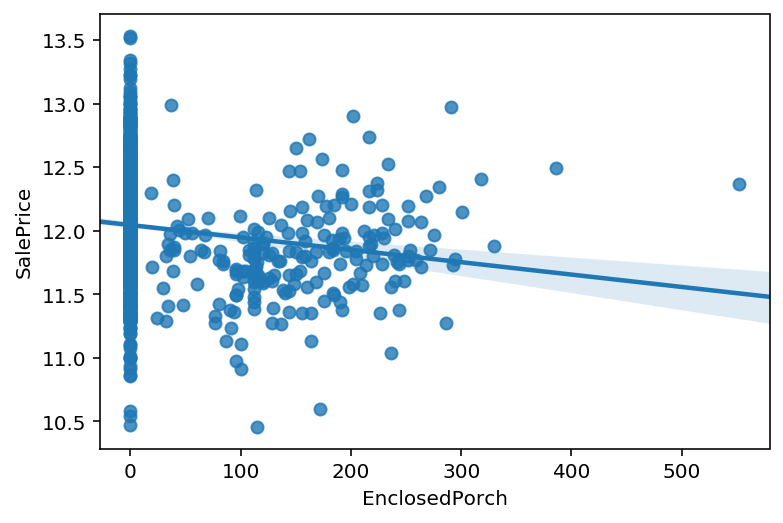

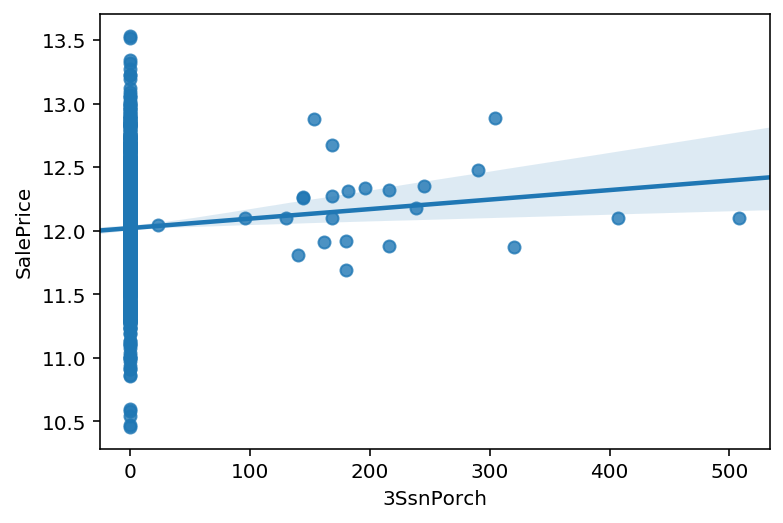

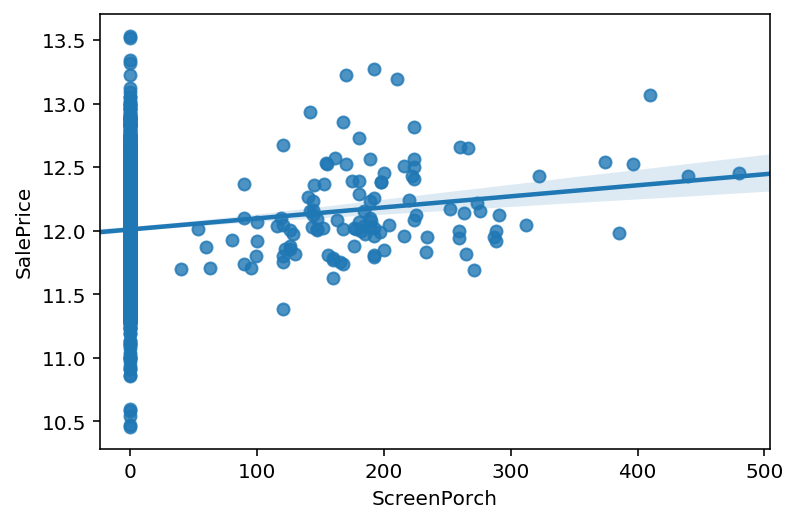

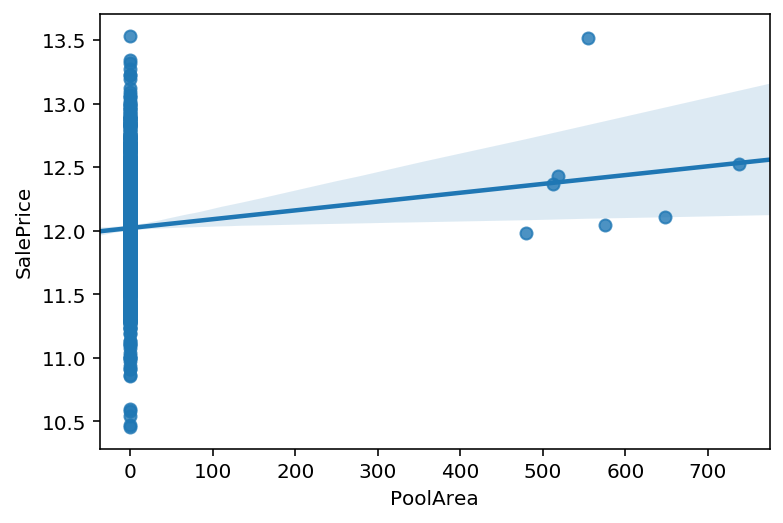

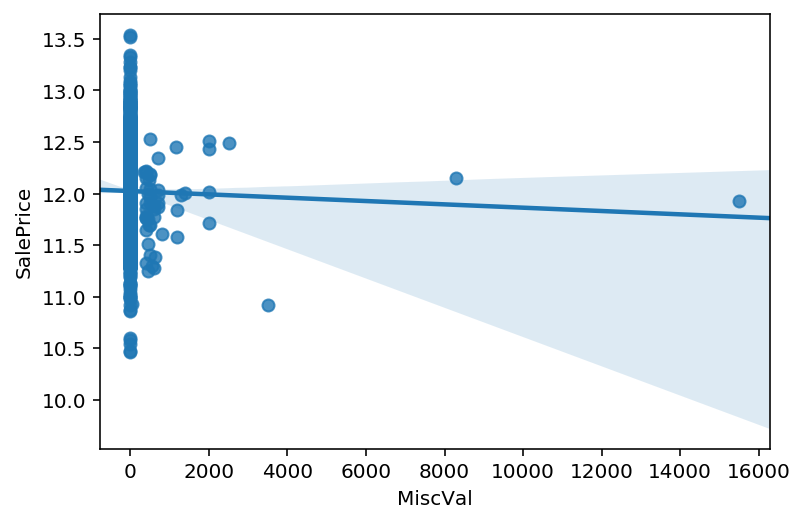

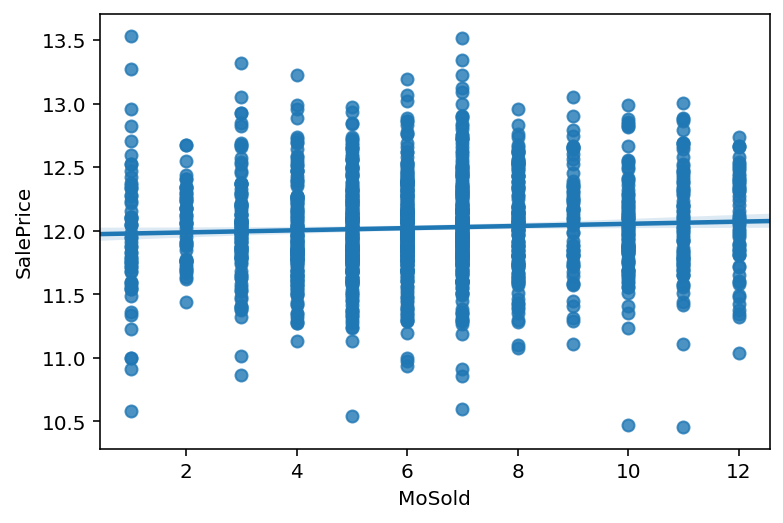

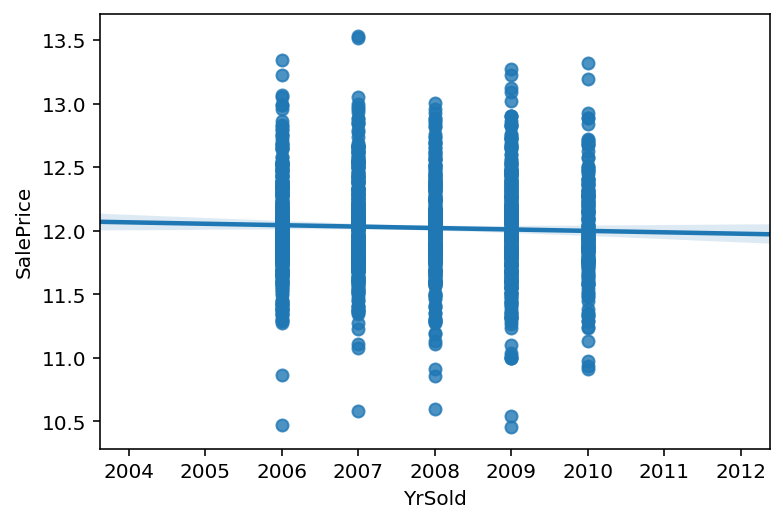

corr : 0.36


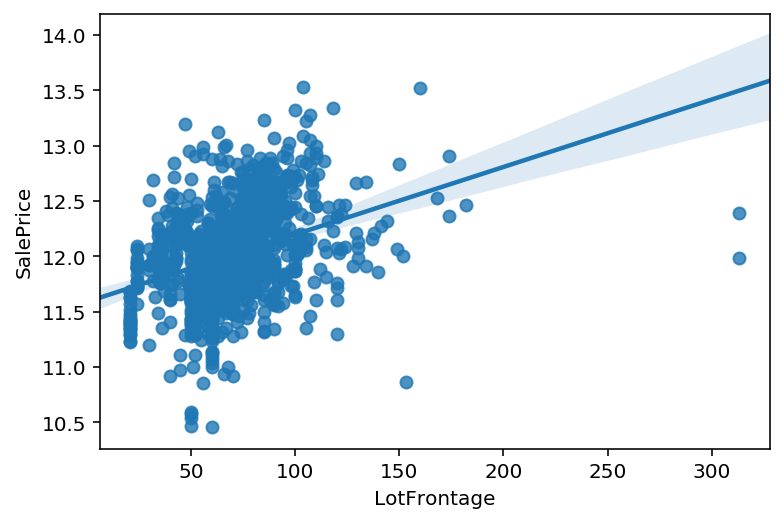

corr : 0.38


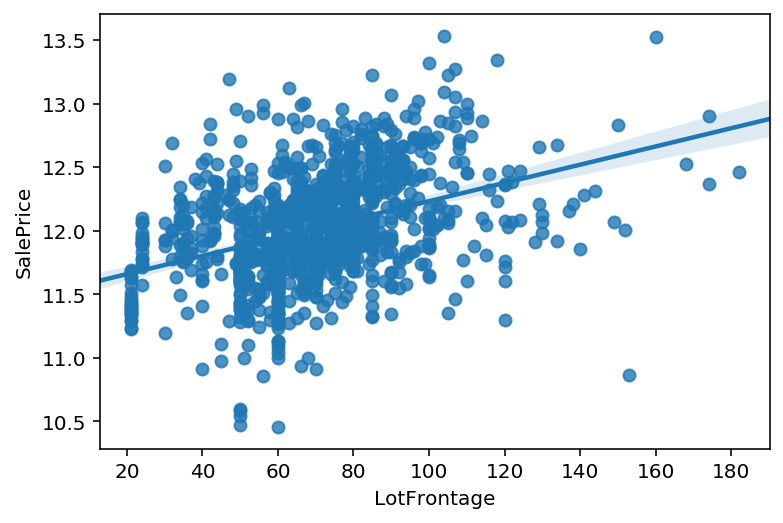

corr : 0.26


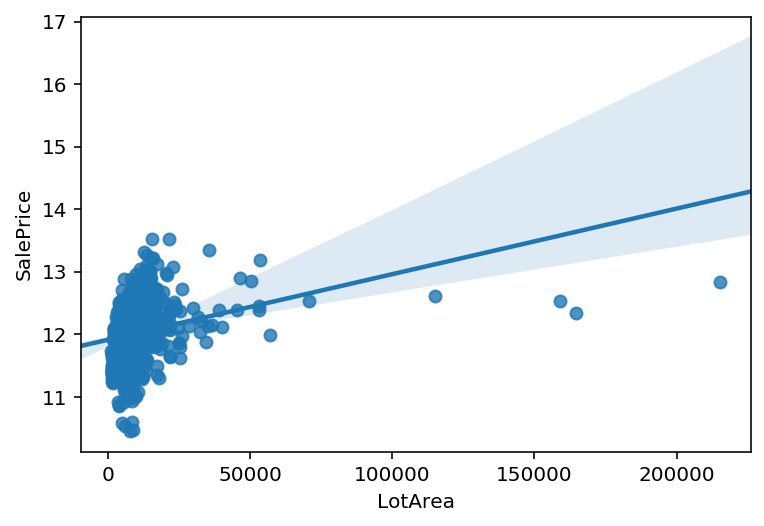

corr : 0.34


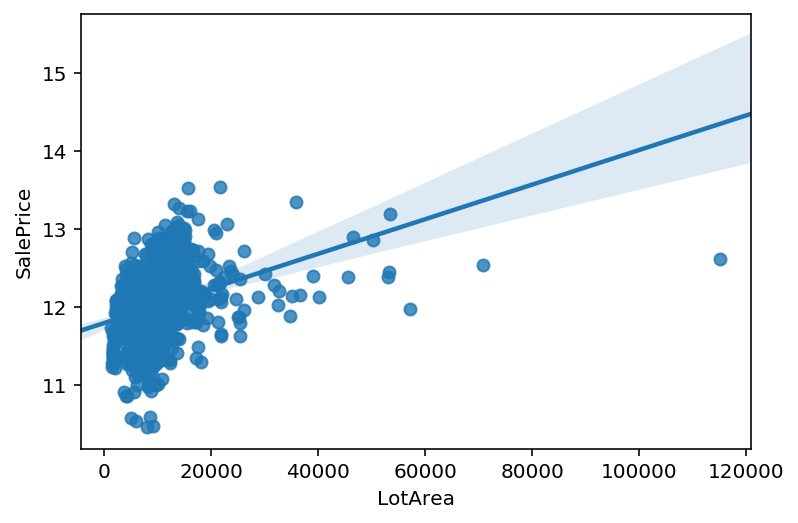

corr : 0.39


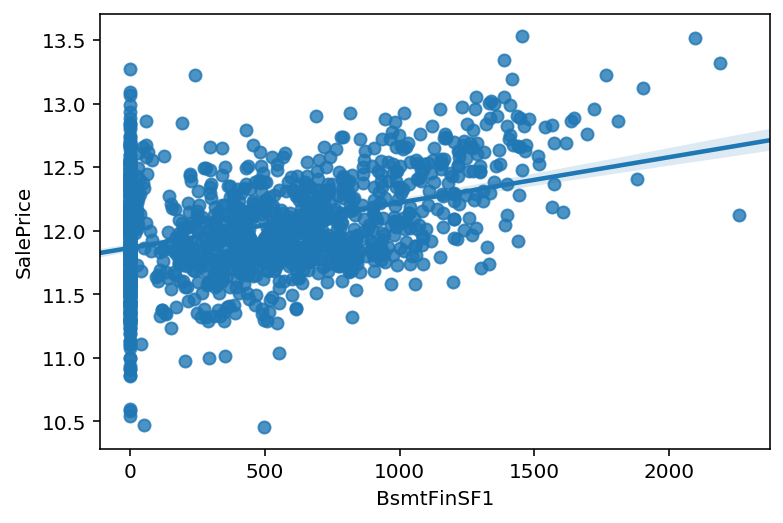

corr : 0.39


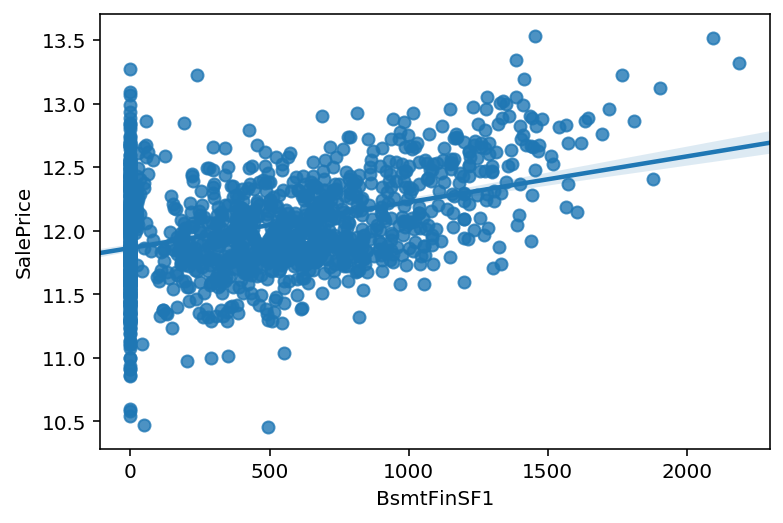

corr : 0.66


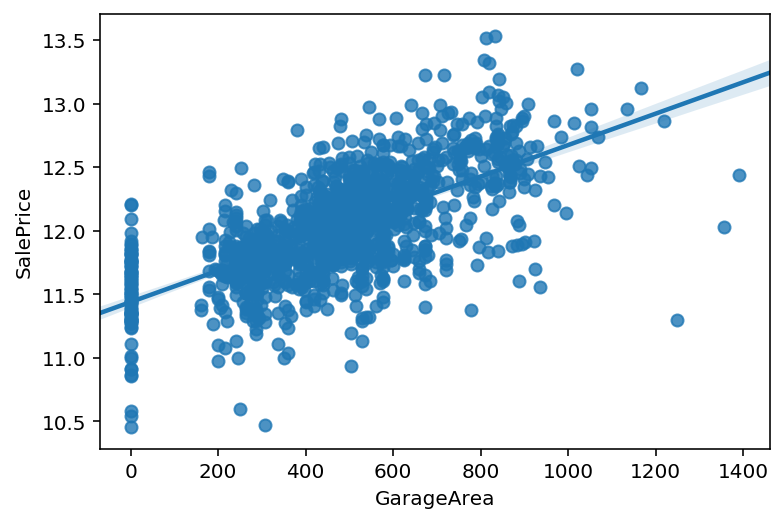

corr : 0.67


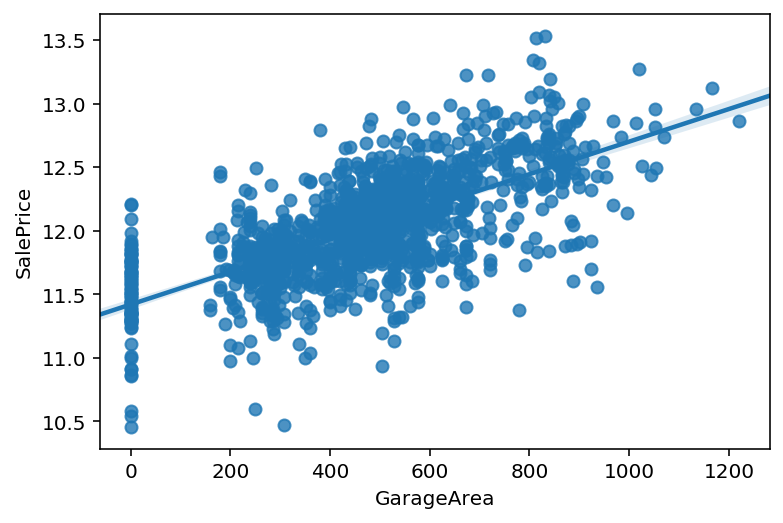

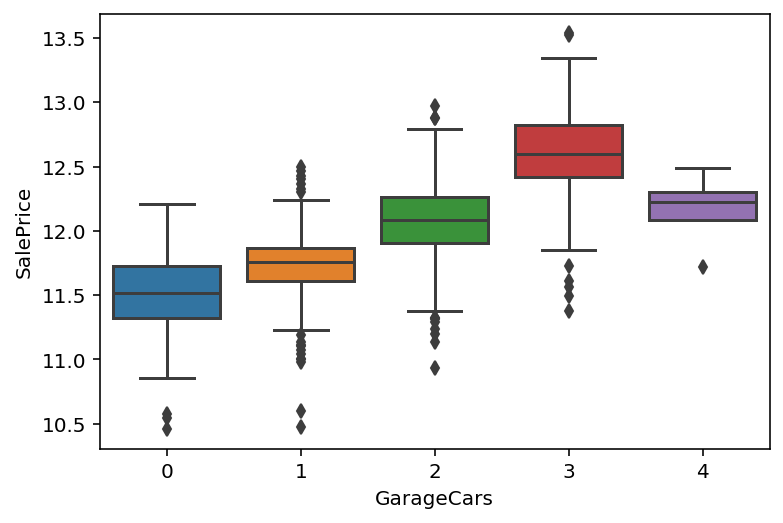

corr : 0.69
corr : 0.34


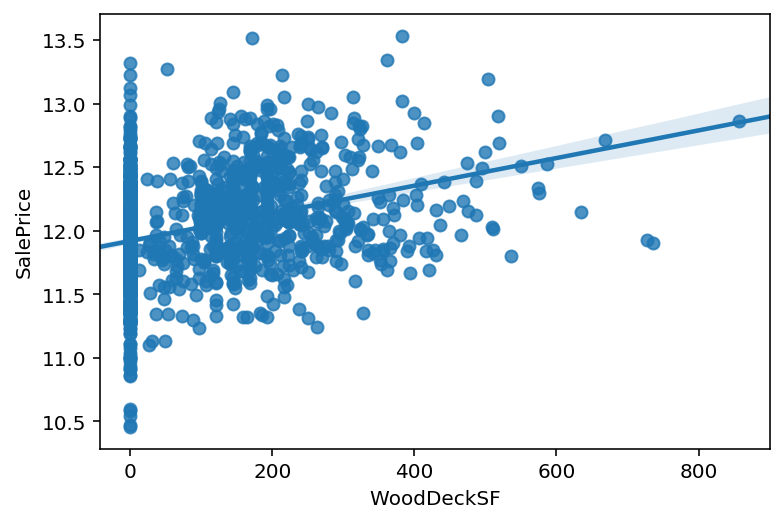

corr : 0.35
corr : 0.33


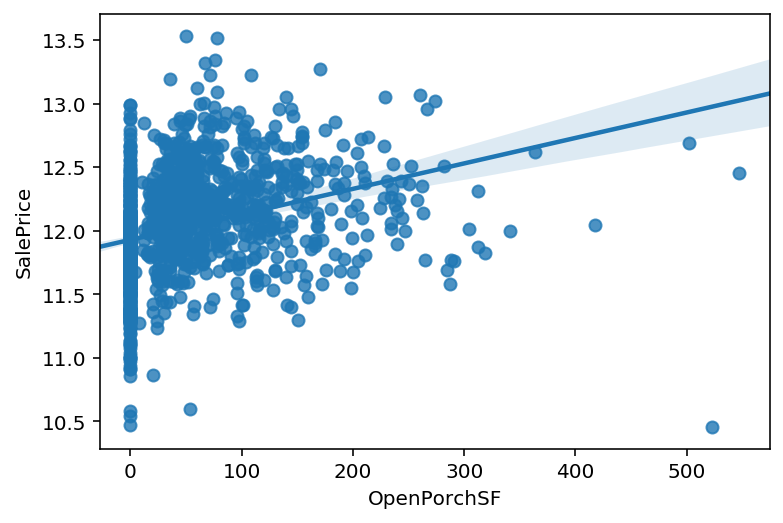

corr : 0.36
(1444, 80)
Supression de 16 outliers
(1444, 80)
(1459, 79)
(1444, 79)
(1444, 67)
(1459, 79)
(1459, 67)
56 features quantitatives
23 features qualitatives
Stored 'quan' (Index)
(1444, 219)
(1459, 219)


In [104]:
%run house_prices_prepare_data.ipynb

### Fit & Prediction
* Ne pas oublier que tout les prix sont transformés en log1p ( np.expm1 pour avoir les vrais prix ) 
* L'évaluation kaggle se fait selon le RMSE ( Root Mean Squared Error)

#### Importance des Features dans le modèle
pour une éventuelle sélection de features

In [ ]:
# xgb = XGBRegressor()
# xgb.fit(X_train, y_train)
# imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
# imp = imp.sort_values(['Importance'], ascending = False)

# print(imp)

In [ ]:
# # Define a function to calculate RMSE
# def rmse(y_true, y_pred):
#     return np.sqrt(np.mean((y_true-y_pred)**2))

# # Define a function to calculate negative RMSE (as a score)
# def nrmse(y_true, y_pred):
#     return -1.0*rmse(y_true, y_pred)

# neg_rmse = make_scorer(nrmse)

# estimator = XGBRegressor()
# selector = RFECV(estimator, cv = 3, n_jobs = -1, scoring = neg_rmse)
# selector = selector.fit(X_train, y_train)

# print("The number of selected features is: {}".format(selector.n_features_))

# features_kept = X_train.columns.values[selector.support_] 
# X_train = X_train[features_kept]
# X_test = X_test[features_kept]

In [ ]:
# features_kept

#### Test XGBRegressor

In [ ]:
# model_xgb = xgb.XGBRegressor()
# model_xgb.fit(X_train, y_train)

#### Kernel Ridge

In [ ]:
# model_krr = KernelRidge()
# model_krr.fit(X_train, y_train)

#### Ridge Regression

In [ ]:
# ridge_reg = Ridge(alpha=1, solver='auto')
# ridge_reg.fit(X_train, y_train)

#### Cross Validation

In [ ]:
# scores = cross_val_score(ridge_reg, X_train, y_train, cv=10)
# print(f"rmse moyenne : {scores.mean()}")
# scores.std()

### Essais de plusieurs modèles en même temps
xgbregressor , kernelridge, Ridge

In [90]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [91]:

model_xgb = XGBRegressor()
model_krr = KernelRidge()
model_reg = Ridge(alpha=30.0, solver='svd')
model_en = ElasticNet()

In [92]:
scores = rmse_cv(model_xgb)
print(f"XGBRegressor score : {scores.mean():.4f} ( std : {scores.std():.4f})")
scores = rmse_cv(model_krr)
print(f"Kernel Ridge Regressor score : {scores.mean():.4f} ( std : {scores.std():.4f})")
scores = rmse_cv(model_reg)
print(f"Ridge score : {scores.mean():.4f} ( std : {scores.std():.4f})")
scores = rmse_cv(model_en)
print(f"ElasticNet score : {scores.mean():.4f} ( std : {scores.std():.4f})")

[14:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor score : 0.1215 ( std : 0.0049)
Kernel Ridge Regressor score : 0.3035 ( std : 0.0567)
Ridge score : 0.1122 ( std : 0.0041)
ElasticNet score : 0.3722 ( std : 0.0118)


#### GridSearch 

In [98]:
ridge = Ridge()

param_grid = [
    {'solver' : ['svd'], 'alpha':[x for x in range(1,50,1)]}
    ]
grid_search = GridSearchCV(ridge,param_grid,cv=10, scoring='neg_mean_squared_error' ,return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                    25, 26, 27, 28, 29, 30, ...],
                          'solver': ['svd']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [99]:
grid_search.best_params_
grid_search.best_estimator_

Ridge(alpha=18, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='svd', tol=0.001)

#### Prédictions

In [100]:
# prediction = np.expm1(model_xgb.predict(X_test))
# y_val_kaggle = np.expm1(model_krr.predict(X_test))
prediction = np.expm1(grid_search.best_estimator_.predict(X_test))

In [101]:
prediction.shape

(1459,)

In [102]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] =  prediction
submission.to_csv('house_prices_pred.csv', index=False)

## Submission Kaggle

In [103]:
d = {'Id':test_ID, 'SalePrice':prediction}
sub = pd.DataFrame(data=d)
sub.to_csv('house_prices_pred.csv', index=False)

submission_file = 'house_prices_pred.csv'
kaggle.api.competition_submit(submission_file, "XGBoost Aro params", "house-prices-advanced-regression-techniques")


100%|██████████| 33.6k/33.6k [00:05<00:00, 6.00kB/s]


Successfully submitted to House Prices: Advanced Regression Techniques